# Slow waves analysis

## Intoductory notes:
This notebook presents slow waves detection functionality.

Recommended reading:
1. [YASA: FAQ](https://raphaelvallat.com/yasa/build/html/faq.html#event-detection)
4. [YASA: Slow-waves detection](https://github.com/raphaelvallat/yasa/blob/master/notebooks/05_sw_detection.ipynb)
5. [YASA: Multi-channel slow-wave detection](https://github.com/raphaelvallat/yasa/blob/master/notebooks/06_sw_detection_multi.ipynb)
6. [YASA: SWResults class](https://raphaelvallat.com/yasa/build/html/generated/yasa.SWResults.html#yasa-swresults)
4. [MNE: Time-frequency analysis: power and inter-trial coherence](https://mne.tools/stable/auto_tutorials/time-freq/20_sensors_time_frequency.html#time-frequency-analysis-power-and-inter-trial-coherence)
5. [MNE: AverageTFR class](https://mne.tools/stable/generated/mne.time_frequency.AverageTFR.html#mne-time-frequency-averagetfr)

## Import module

In [1]:
from sleepeeg.pipeline import SlowWavesPipe

## Spindles detection

In [2]:
slow_waves_pipe = SlowWavesPipe(
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\HZ4\after_ica_raw.fif",
    output_dir=r"C:\Users\Gennadiy\Documents\data\HZ4",
    path_to_hypno=r"C:\Users\Gennadiy\Documents\data\HZ4\staging.txt",
    hypno_freq=1,
)

Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\after_ica_raw.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 0 ... 2032249 =      0.000 ...  8128.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\after_ica_raw-1.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 2032250 ... 2229772 =   8129.000 ...  8919.088 secs
Ready.


Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


Please refer to the YASA's [documentation](https://raphaelvallat.com/yasa/build/html/generated/yasa.sw_detect.html) for details about the arguments.

In [3]:
slow_waves_pipe.detect(
    picks=["eeg"],
    reference="average",
    include=(0, 1, 2, 3, 4),
    freq_sw=(0.3, 1.5),
    dur_neg=(0.3, 1.5),
    dur_pos=(0.1, 1),
    amp_neg=(40, 200),
    amp_pos=(10, 150),
    amp_ptp=(75, 350),
    coupling=False,
    coupling_params={"freq_sp": (12, 16), "p": 0.05, "time": 1},
    remove_outliers=False,
    verbose=False,
    save=True,
)

Reading 0 ... 2229772  =      0.000 ...  8919.088 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Removing existing average EEG reference projection.


15-Sep-23 15:00:50 | INFO | Number of unique values in hypno = 5
15-Sep-23 15:00:50 | INFO | Number of samples in data = 2229773
15-Sep-23 15:00:50 | INFO | Sampling frequency = 250.00 Hz
15-Sep-23 15:00:50 | INFO | Data duration = 8919.09 seconds
15-Sep-23 15:00:57 | INFO | Trimmed standard deviation of E1 = 14.5162 uV
15-Sep-23 15:00:57 | INFO | Peak-to-peak amplitude of E1 = 3688.5618 uV
15-Sep-23 15:00:57 | INFO | Trimmed standard deviation of E2 = 16.2150 uV
15-Sep-23 15:00:57 | INFO | Peak-to-peak amplitude of E2 = 8828.0429 uV
15-Sep-23 15:00:57 | INFO | Trimmed standard deviation of E3 = 16.1373 uV
15-Sep-23 15:00:57 | INFO | Peak-to-peak amplitude of E3 = 5481.6239 uV
15-Sep-23 15:00:57 | INFO | Trimmed standard deviation of E4 = 16.0685 uV
15-Sep-23 15:00:57 | INFO | Peak-to-peak amplitude of E4 = 5242.0351 uV
15-Sep-23 15:00:57 | INFO | Trimmed standard deviation of E5 = 16.2787 uV
15-Sep-23 15:00:57 | INFO | Peak-to-peak amplitude of E5 = 15585.4875 uV
15-Sep-23 15:00:57 | 

Please refer to the YASA's [documentation](https://raphaelvallat.com/yasa/build/html/generated/yasa.SWResults.html) for details about the arguments.

In [4]:
slow_waves_pipe.results.summary(
    grp_chan=False, grp_stage=True, mask=None, aggfunc="mean", sort=True
)

,Count,Density,Duration,ValNegPeak,ValPosPeak,PTP,Slope,Frequency
Stage,,,,,,,,
0,2329,131.943212,1.477807,-80.511147,54.811850,135.322998,406.946887,0.743096
1,1282,197.230769,1.213073,-74.935751,48.445399,123.381150,447.816637,0.883879
2,7824,119.450382,1.227901,-70.057575,43.481360,113.538935,408.784250,0.863237
3,78070,1881.204819,1.231356,-63.600864,49.985412,113.586275,409.571544,0.856829
4,308,17.600000,1.498948,-70.945321,47.948955,118.894276,335.520558,0.728133


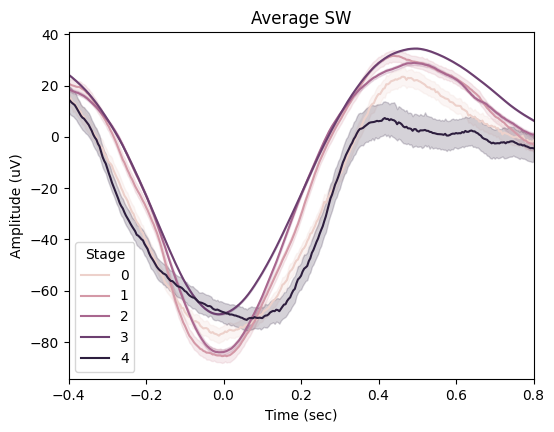

In [5]:
slow_waves_pipe.plot_average(
    save=True,
    center="NegPeak",
    hue="Stage",
    time_before=0.4,
    time_after=0.8,
    filt=(None, None),
    mask=None,
)

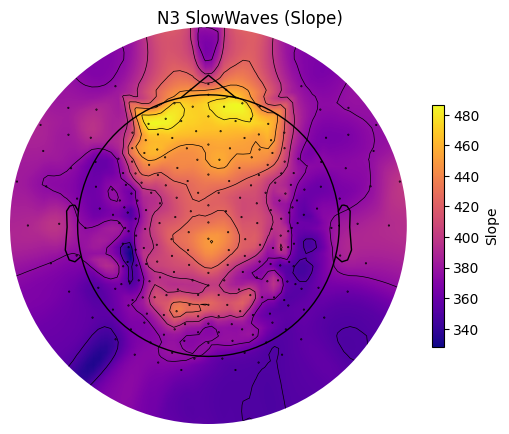

In [6]:
slow_waves_pipe.plot_topomap(
    prop="Slope",  #  Any of the event properties returned by pipe.results.summary().
    stage="N3",  # Stage to plot the topomap for.
    aggfunc="mean",  # Aggregation function for channel grouping.
    # Should contain at least index of the provided "stage".
    sleep_stages={"Wake": 0, "N1": 1, "N2": 2, "N3": 3, "REM": 4},
    axis=None,  # Whether to plot on provided matplotlib axis.
    save=True,  # Whether to save the plot as a file.
    topomap_args=dict(cmap="plasma"),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
)

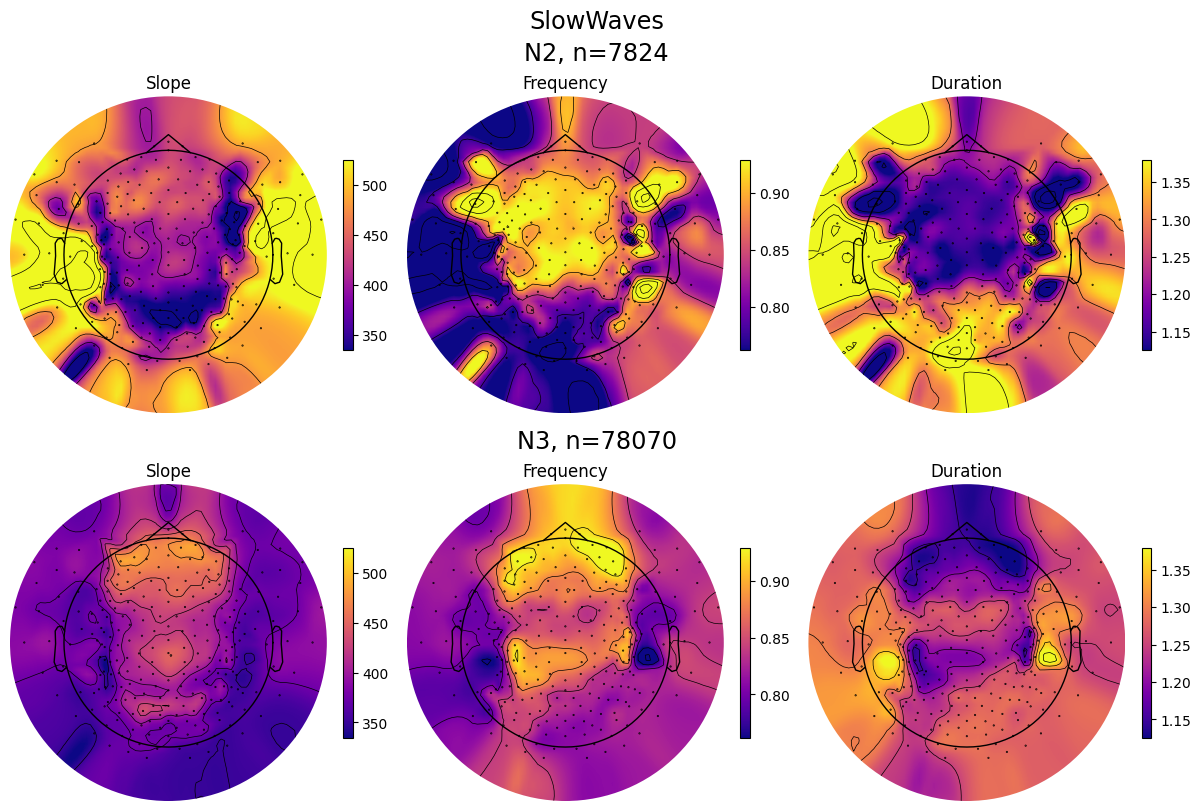

In [7]:
slow_waves_pipe.plot_topomap_collage(
    # Some of the event properties returned by pipe.results.summary().
    props=["Slope", "Frequency", "Duration"],
    aggfunc="mean",  # Aggregation function for channel grouping.
    # Tuple of strs or "all", e.g., ("N1", "REM") or "all" (plots all "sleep_stages").
    stages_to_plot="all",
    # Should contain at least indices of the provided "stages_to_plot".
    sleep_stages={"N2": 2, "N3": 3},
    low_percentile=5,  # Set min color value by percentile of the property data.
    high_percentile=95,  # Set max color value by percentile of the property data.
    fig=None,  # Instance of plt.Figure, a new fig will be created if None.
    save=True,  # Whether to save the plot as a file.
    topomap_args=dict(cmap="plasma"),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
)

Constructs MNE [AverageTFR](https://mne.tools/stable/generated/mne.time_frequency.AverageTFR.html) object for every available sleep stage.

In [8]:
slow_waves_pipe.apply_tfr(
    freqs=(0.5, 5),  # Interval of frequencies of interest.
    n_freqs=100,  # TFR frequency resolution.
    time_before=4,  # Time in sec before the peak to use in TFR computation. Should be positive.
    time_after=4,  # Time in sec after the peak to use in TFR computation.
    method="morlet",  # TFR method: 'morlet' or 'multitaper'.
    save=True,  # Whether to save AverageTFR object per sleep stage as hdf5 file.
    overwrite=False,  # Whether to overwrite existings files.
    n_cycles=2,
)

slow_waves_pipe.tfrs

100%|██████████| 257/257 [00:18<00:00, 13.79it/s]


{'N3': <AverageTFR | time : [-4.000000, 4.000000], freq : [0.500000, 5.000000], nave : 303, channels : 257, ~392.6 MB>,
 'REM': <AverageTFR | time : [-4.000000, 4.000000], freq : [0.500000, 5.000000], nave : 3, channels : 97, ~148.3 MB>,
 'N2': <AverageTFR | time : [-4.000000, 4.000000], freq : [0.500000, 5.000000], nave : 30, channels : 256, ~391.1 MB>,
 'N1': <AverageTFR | time : [-4.000000, 4.000000], freq : [0.500000, 5.000000], nave : 5, channels : 250, ~381.9 MB>,
 'Wake': <AverageTFR | time : [-4.000000, 4.000000], freq : [0.500000, 5.000000], nave : 9, channels : 257, ~392.6 MB>}

In [9]:
slow_waves_pipe.tfrs["N2"].data

array([[[ 3404.65724757,  3440.74834113,  3477.07558149, ...,
         23568.42338948, 23425.46633025, 23282.42737751],
        [ 2836.38762693,  2868.46055931,  2900.76422698, ...,
         19888.62528315, 19778.24889273, 19667.50161364],
        [ 2388.6378046 ,  2416.8501116 ,  2445.27747145, ...,
         17308.87099101, 17227.40958121, 17145.18155751],
        ...,
        [ 2070.11340657,  2189.04555608,  2298.93707451, ...,
          7352.50356372,  7148.56901076,  6897.4150568 ],
        [ 2064.32677706,  2185.07530504,  2296.81045014, ...,
          7315.67508099,  7111.06186175,  6858.56113553],
        [ 2058.09676101,  2180.61557957,  2294.15262059, ...,
          7279.65637781,  7074.2778563 ,  6820.35726529]],

       [[15893.16021206, 16019.58034116, 16146.12850867, ...,
         46772.79807996, 46412.64194844, 46052.80515214],
        [15095.52780212, 15226.12790355, 15356.84272971, ...,
         43101.78120154, 42744.56946024, 42387.61568409],
        [14425.52599923, 

In [10]:
slow_waves_pipe.tfrs["N2"].to_data_frame()

,time,freq,E1,E10,E100,E101,E102,E103,E104,E105,...,E91,E92,E93,E94,E95,E96,E97,E98,E99,VREF
0,-4.000,0.5,3404.657248,15893.160212,14180.244601,15469.631406,13628.602991,10487.254346,11445.330572,14082.192897,...,5602.458963,2807.332079,8360.833743,8359.978545,3777.341718,7952.066913,5634.702277,7284.494319,4032.439640,10467.214292
1,-3.996,0.5,3440.748341,16019.580341,14298.014614,15598.982508,13745.414272,10569.443206,11532.854285,14178.853129,...,5643.320877,2818.689099,8422.688524,8432.745423,3800.995204,8010.363874,5688.677499,7349.289762,4068.708258,10546.678101
2,-3.992,0.5,3477.075581,16146.128509,14416.015143,15728.608412,13862.526473,10651.792690,11620.494968,14275.471610,...,5684.235045,2829.942791,8484.487826,8505.646750,3824.580783,8068.601426,5742.802636,7414.243235,4105.069332,10626.242168
3,-3.988,0.5,3513.638512,16272.794009,14534.238941,15858.501584,13979.931967,10734.298867,11708.247557,14372.041536,...,5725.199594,2841.092904,8546.224873,8578.675532,3848.096033,8126.772273,5797.072140,7479.349188,4141.519791,10705.901948
4,-3.984,0.5,3550.436553,16399.566230,14652.678492,15988.654458,14097.623061,10816.957799,11796.106999,14468.556143,...,5766.212645,2852.139283,8607.892902,8651.824764,3871.538467,8184.869165,5851.480410,7544.602022,4178.056544,10785.652929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200095,3.984,5.0,7525.579927,3850.569925,3517.477490,3877.756543,3722.031063,3271.566235,3279.268295,3095.459771,...,1596.992147,1839.257039,2492.447806,2377.722775,1606.049212,1152.285513,1197.061942,1643.353394,1801.440276,2187.949450
200096,3.988,5.0,7431.407279,3722.826508,3375.380272,3731.222067,3589.122640,3147.217155,3150.672947,2976.024108,...,1564.615867,1741.836395,2405.876226,2283.210663,1587.935081,1114.535586,1171.649440,1586.749539,1724.673535,2077.185690
200097,3.992,5.0,7279.656378,3577.159087,3222.719637,3570.844595,3441.442268,3010.627662,3010.293229,2844.847850,...,1521.953452,1638.709988,2308.982746,2179.655520,1559.663005,1071.381564,1139.214533,1523.162559,1642.342211,1963.303245
200098,3.996,5.0,7074.277856,3415.537031,3060.819831,3398.250162,3280.645544,2863.343343,2859.709494,2703.484863,...,1469.805747,1531.544670,2202.907074,2068.426747,1521.368529,1023.404349,1100.211968,1453.390850,1555.348708,1847.059354


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


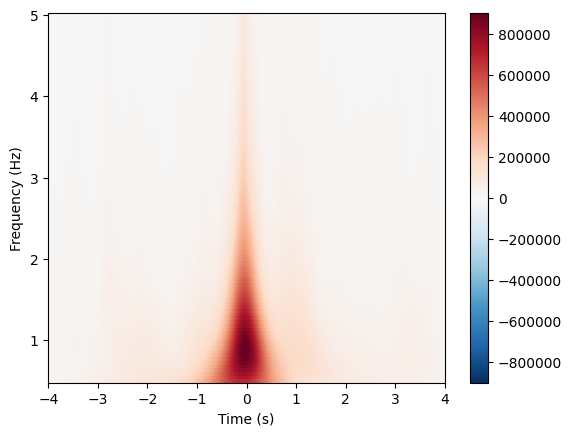

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


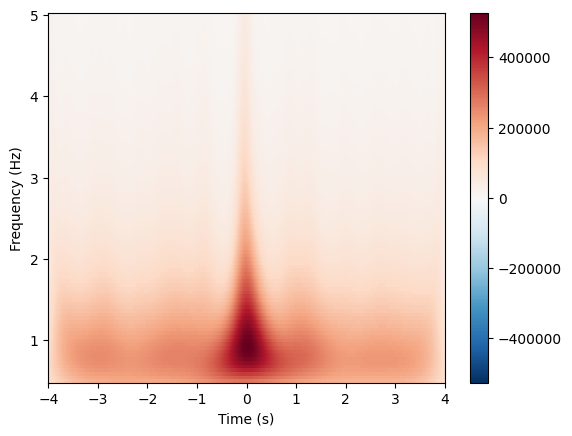

[<Figure size 640x480 with 2 Axes>]

In [11]:
slow_waves_pipe.tfrs["N2"].plot(["E101"]),
slow_waves_pipe.tfrs["N3"].plot(["E101"])

If you want to load saved TFR files:

In [12]:
slow_waves_pipe.read_tfrs(dirpath=None)

Reading C:\Users\Gennadiy\Documents\data\HZ4\SlowWavesPipe\slowwaves_N1-tfr.h5 ...
Reading C:\Users\Gennadiy\Documents\data\HZ4\SlowWavesPipe\slowwaves_N2-tfr.h5 ...
Reading C:\Users\Gennadiy\Documents\data\HZ4\SlowWavesPipe\slowwaves_N3-tfr.h5 ...
Reading C:\Users\Gennadiy\Documents\data\HZ4\SlowWavesPipe\slowwaves_REM-tfr.h5 ...
Reading C:\Users\Gennadiy\Documents\data\HZ4\SlowWavesPipe\slowwaves_Wake-tfr.h5 ...
